# **Automatidata (case-study)**

# Build a multiple linear regression model

### 1a. Imports and loading
Import the packages that you've learned are needed for building linear regression models.

In [1]:
# Imports
# Packages for numerics + dataframes
import numpy as np
import pandas as pd

# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Packages for date conversions for calculating trip durations
from datetime import datetime, date, timedelta

# Packages for OLS, MLR, confusion matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [2]:
# Load dataset into dataframe 
df0=pd.read_csv("2017_Yellow_Taxi_Trip_Data.csv")

Start with `.shape` and `.info()`.

In [3]:
# Start with `.shape` and `.info()`
print(df0.shape)
df0.info()

(22699, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  flo

In [4]:
# Check for missing data and duplicates using .isna() and .drop_duplicates()
df0.isnull().sum().sum()

0

In [5]:
df0.duplicated().sum()

0

In [6]:
df0.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


### 2b. Convert pickup & dropoff columns to datetime


In [7]:
# Check the format of the data
print(df0['tpep_dropoff_datetime'].iloc[0])
print(df0['tpep_pickup_datetime'].iloc[0])

03/25/2017 9:09:47 AM
03/25/2017 8:55:43 AM


In [8]:
# Convert datetime columns to datetime
df0['tpep_dropoff_datetime'] = pd.to_datetime(df0['tpep_dropoff_datetime'], format="%m/%d/%Y %I:%M:%S %p")
df0['tpep_pickup_datetime'] = pd.to_datetime(df0['tpep_pickup_datetime'], format="%m/%d/%Y %I:%M:%S %p")

### Task 2c. Create duration column

Create a new column called `duration` that represents the total number of minutes that each taxi ride took.

In [9]:
# Create `duration` column
df0['duration'] = (df0['tpep_dropoff_datetime'] - df0['tpep_pickup_datetime']) / np.timedelta64(1, 'm')

### Outliers

Call `df.info()` to inspect the columns and decide which ones to check for outliers.

In [10]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

The most important columns to check for outliers are likely to be:
* `trip_distance`
* `fare_amount`
* `duration`



### 2d. Box plots

Plot a box plot for each feature: `trip_distance`, `fare_amount`, `duration`.

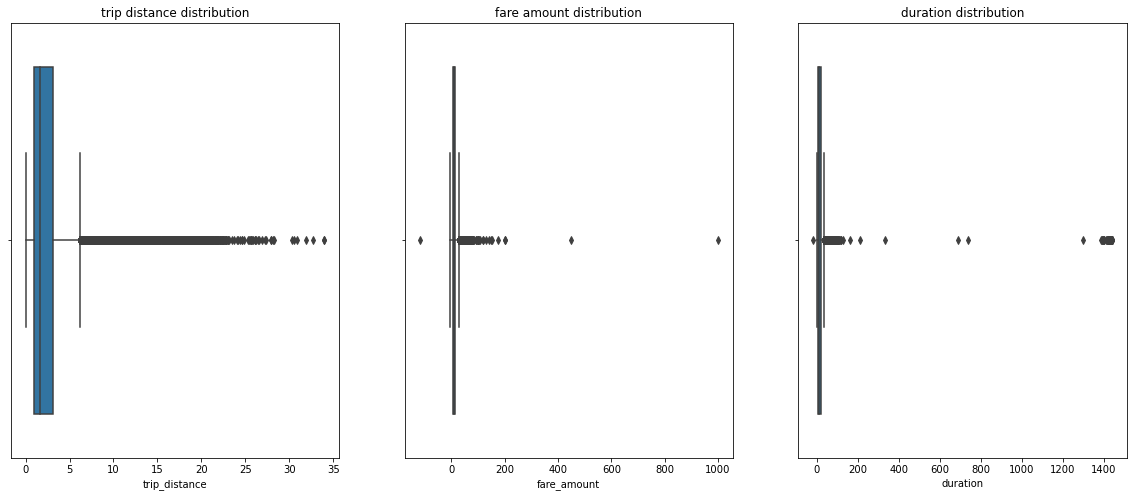

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(20, 8))
sns.boxplot(df0.trip_distance, ax=axes[0])
axes[0].set_title("trip distance distribution")
sns.boxplot(df0.fare_amount, ax=axes[1])
axes[1].set_title("fare amount distribution")
sns.boxplot(df0.duration, ax=axes[2] )
axes[2].set_title('duration distribution')
plt.show()

### 2e. Imputations

#### `trip_distance` outliers

In [12]:
# Are trip distances of 0 bad data or very short trips rounded down?
sorted(set(df0.trip_distance))[:10]

[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]

The distances are captured with a high degree of precision. However, it might be possible for trips to have distances of zero if a passenger summoned a taxi and then changed their mind.

In [13]:
print(f"Number of trips that have zero distance {df0[df0.trip_distance == 0].shape[0]}")

Number of trips that have zero distance 148


#### `fare_amount` outliers

In [14]:
Q1 = df0['fare_amount'].quantile(.25)
Q3 = df0['fare_amount'].quantile(.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Number of fare amount outliers {df0[(df0.trip_distance < lower_bound) | (df0.trip_distance > upper_bound)].shape[0]}")

Number of fare amount outliers 15


Impute values less than $0 with `0`.

In [15]:
# Impute values less than $0 with 0
df0.loc[df0['fare_amount'] < 0, 'fare_amount'] = 0
df0.fare_amount.min()

0.0

Now impute the maximum value as `Q3 + (6 * IQR)`.

In [16]:
def impute_upper_outliers(column_list: [list], iqr_factor: int) -> None:
    '''
    Impute upper-limit values in specified columns based on their interquartile range.

    Arguments:
        column_list: A list of columns to iterate over
        iqr_factor: A number representing x in the formula:
                    Q3 + (x * IQR). Used to determine maximum threshold,
                    beyond which a point is considered an outlier.

    The IQR is computed for each column in column_list and values exceeding
    the upper threshold for each column are imputed with the upper threshold value.
    '''
    for col in column_list:
        # Reassign minimum to zero
        df0.loc[df0[col] < 0, col] = 0
        # Calculate upper threshold
        Q1 = df0[col].quantile(.25)
        Q3 = df0[col].quantile(.75)
        IQR = Q3 - Q1
        upper_bound = Q3 + iqr_factor * IQR
        # Reassign values > threshold to threshold
        df0.loc[df0[col] > upper_bound, col] = upper_bound

In [17]:
# Impute a 0 for any negative values and the high outliers for the amount column
impute_upper_outliers(['fare_amount'], 6)

#### `duration` outliers


In [18]:
# Call .describe() for duration outliers
df0.duration.describe()

count    22699.000000
mean        17.013777
std         61.996482
min        -16.983333
25%          6.650000
50%         11.183333
75%         18.383333
max       1439.550000
Name: duration, dtype: float64

The `duration` column has problematic values at both the lower and upper extremities.

* **Low values:** There should be no values that represent negative time. Impute all negative durations with `0`.

* **High values:** Impute high values the same way you imputed the high-end outliers for fares: `Q3 + (6 * IQR)`.

In [19]:
# Impute a 0 for any negative values and the high outliers for the duration column
impute_upper_outliers(['duration'], 6)

### 3a. Feature engineering

#### Create `mean_distance` column

In [20]:
# Create `pickup_dropoff` column
df0['pickup_dropoff'] = df0.PULocationID.astype("str") + ' ' + df0.DOLocationID.astype("str")
df0.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,14.066667,100 231
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,26.500000,186 43
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.200000,262 236
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000,188 97
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,16.716667,4 112


In [21]:
grouped = df0.groupby("pickup_dropoff").mean()[["trip_distance"]]
grouped.head()

,trip_distance
pickup_dropoff,
1 1,2.433333
10 148,15.700000
100 1,16.890000
100 100,0.253333
100 107,1.180000


In [22]:
# 1. Convert `grouped` to a dictionary
grouped_dict = grouped.to_dict()
# 2. Reassign to only contain the inner dictionary
grouped_dict = grouped_dict['trip_distance']
grouped_dict

{'1 1': 2.433333333333333,
 '10 148': 15.7,
 '100 1': 16.89,
 '100 100': 0.25333333333333335,
 '100 107': 1.18,
 '100 113': 2.024,
 '100 114': 1.94,
 '100 12': 4.55,
 '100 125': 2.84,
 '100 13': 4.201666666666667,
 '100 132': 17.2175,
 '100 137': 1.299,
 '100 138': 10.432857142857143,
 '100 140': 2.746,
 '100 141': 2.11,
 '100 142': 1.6958333333333335,
 '100 143': 1.5825,
 '100 144': 3.0066666666666664,
 '100 148': 4.1066666666666665,
 '100 151': 3.668,
 '100 152': 4.9,
 '100 158': 1.938,
 '100 161': 0.9813888888888889,
 '100 162': 1.2163636363636363,
 '100 163': 1.2656,
 '100 164': 0.841,
 '100 166': 5.199999999999999,
 '100 170': 0.8548,
 '100 177': 12.0,
 '100 181': 9.34,
 '100 186': 0.6404761904761904,
 '100 193': 4.39,
 '100 198': 9.01,
 '100 202': 5.3,
 '100 209': 4.43,
 '100 211': 2.48,
 '100 224': 1.9500000000000002,
 '100 225': 7.5,
 '100 229': 1.7850000000000001,
 '100 230': 0.72975,
 '100 231': 3.5216666666666665,
 '100 232': 3.8449999999999998,
 '100 233': 1.245833333333333

In [23]:
# 1. Create a mean_distance column that is a copy of the pickup_dropoff helper column
df0['mean_distance'] = df0['pickup_dropoff']
# 2. Map `grouped_dict` to the `mean_distance` column
df0['mean_distance'] = df0['mean_distance'].map(grouped_dict)
# Confirm that it worked
df0.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,13.0,0.0,0.5,2.76,0.0,0.3,16.56,14.066667,100 231,3.521667
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,16.0,0.0,0.5,4.00,0.0,0.3,20.80,26.500000,186 43,3.108889
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.200000,262 236,0.881429
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000,188 97,3.700000
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,16.5,0.5,0.5,0.00,0.0,0.3,17.80,16.716667,4 112,4.435000


#### Create `mean_duration` column

Repeat the process used to create the `mean_distance` column to create a `mean_duration` column.

In [24]:
duration_grouped = df0.groupby("pickup_dropoff").mean()[["duration"]]
duration_grouped_dict = duration_grouped.to_dict()['duration']
df0['mean_duration'] = df0['pickup_dropoff']
df0['mean_duration'] = df0['mean_duration'].map(duration_grouped_dict)
# Confirm that it worked
df0.tail()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration
22694,14873857,2,2017-02-24 17:37:23,2017-02-24 17:40:39,3,0.61,1,N,48,186,...,1.0,0.5,0.00,0.00,0.3,5.80,3.266667,48 186,1.098214,8.594643
22695,66632549,2,2017-08-06 16:43:59,2017-08-06 17:24:47,1,16.71,2,N,132,164,...,0.0,0.5,14.64,5.76,0.3,73.20,40.800000,132 164,18.757500,59.560417
22696,74239933,2,2017-09-04 14:54:14,2017-09-04 14:58:22,1,0.42,1,N,107,234,...,0.0,0.5,0.00,0.00,0.3,5.30,4.133333,107 234,0.684242,6.609091
22697,60217333,2,2017-07-15 12:56:30,2017-07-15 13:08:26,1,2.36,1,N,68,144,...,0.0,0.5,1.70,0.00,0.3,13.00,11.933333,68 144,2.077500,16.650000
22698,17208911,1,2017-03-02 13:02:49,2017-03-02 13:16:09,1,2.10,1,N,239,236,...,0.0,0.5,2.35,0.00,0.3,14.15,13.333333,239 236,1.476970,9.405556


#### Create `day` and `month` columns

Create two new columns, `day` (name of day) and `month` (name of month) by extracting the relevant information from the `tpep_pickup_datetime` column.

In [25]:
# Create 'day' col
df0['day'] = df0['tpep_pickup_datetime'].dt.day_name()
# Create 'month' col
df0['month'] = df0['tpep_pickup_datetime'].dt.strftime("%b")
df0.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,2.76,0.0,0.3,16.56,14.066667,100 231,3.521667,22.847222,Saturday,Mar
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,4.00,0.0,0.3,20.80,26.500000,186 43,3.108889,24.470370,Tuesday,Apr
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,1.45,0.0,0.3,8.75,7.200000,262 236,0.881429,7.250000,Friday,Dec
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,6.39,0.0,0.3,27.69,30.250000,188 97,3.700000,30.250000,Sunday,May
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,0.00,0.0,0.3,17.80,16.716667,4 112,4.435000,14.616667,Saturday,Apr


#### Create `rush_hour` column

* Any weekday (not Saturday or Sunday) AND
* Either from 06:00&ndash;10:00 or from 16:00&ndash;20:00

Create a binary `rush_hour` column that contains a 1 if the ride was during rush hour and a 0 if it was not.

In [26]:
# Create 'rush_hour' col
df0['rush_hour'] = ~df0.day.isin(['Saturday', 'Sunday']) & df0.tpep_pickup_datetime.dt.hour.isin([6, 7, 8, 9, 10, 16, 17, 18, 19, 20])
df0['rush_hour'] = df0['rush_hour'].astype("int")
df0.head(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month,rush_hour
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,0.0,0.3,16.56,14.066667,100 231,3.521667,22.847222,Saturday,Mar,0
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,0.0,0.3,20.80,26.500000,186 43,3.108889,24.470370,Tuesday,Apr,0
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,0.0,0.3,8.75,7.200000,262 236,0.881429,7.250000,Friday,Dec,1
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,0.0,0.3,27.69,30.250000,188 97,3.700000,30.250000,Sunday,May,0
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,0.0,0.3,17.80,16.716667,4 112,4.435000,14.616667,Saturday,Apr,0
5,23345809,2,2017-03-25 20:34:11,2017-03-25 20:42:11,6,2.30,1,N,161,236,...,0.0,0.3,12.36,8.000000,161 236,2.052258,11.855376,Saturday,Mar,0
6,37660487,2,2017-05-03 19:04:09,2017-05-03 20:03:47,1,12.83,1,N,79,241,...,0.0,0.3,59.16,59.633333,79 241,12.830000,59.633333,Wednesday,May,1
7,69059411,2,2017-08-15 17:41:06,2017-08-15 18:03:05,1,2.98,1,N,237,114,...,0.0,0.3,19.58,21.983333,237 114,4.022500,26.437500,Tuesday,Aug,1
8,8433159,2,2017-02-04 16:17:07,2017-02-04 16:29:14,1,1.20,1,N,234,249,...,0.0,0.3,9.80,12.116667,234 249,1.019259,7.873457,Saturday,Feb,0
9,95294817,1,2017-11-10 15:20:29,2017-11-10 15:40:55,1,1.60,1,N,239,237,...,0.0,0.3,16.55,20.433333,239 237,1.580000,10.541111,Friday,Nov,0


### 4. Scatter plot

Create a scatterplot to visualize the relationship between `mean_duration` and `fare_amount`.

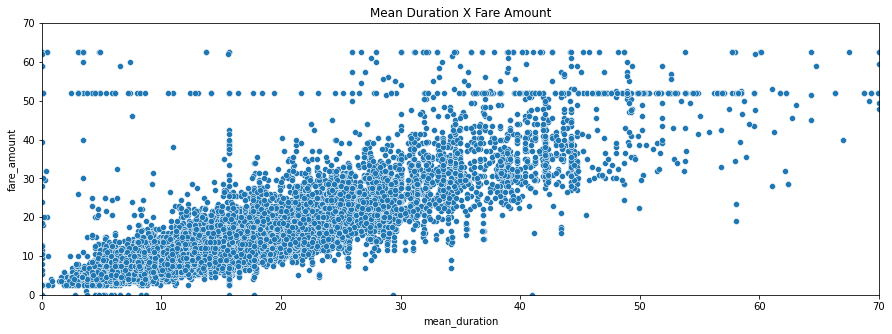

In [27]:
# Create a scatterplot to visualize the relationship between variables of interest
plt.figure(figsize=(15, 5))
ax = sns.scatterplot(data=df0, x='mean_duration', y='fare_amount');
ax.set_title("Mean Duration X Fare Amount")
plt.ylim(0, 70)
plt.xlim(0, 70)
plt.show()

Check the value of the rides in the second horizontal line in the scatter plot.

In [28]:
df0[df0['fare_amount'] > 50]['fare_amount'].value_counts().head()

52.0    514
62.5     84
59.0      9
50.5      9
57.5      8
Name: fare_amount, dtype: int64

Examine the first 30 of these trips.

In [29]:
# Set pandas to display all columns
pd.set_option("display.max_columns", None)
df0[df0['fare_amount'] == 52].head(30)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month,rush_hour
11,18600059,2,2017-03-05 19:15:30,2017-03-05 19:52:18,2,18.90,2,N,236,132,1,52.0,0.0,0.5,14.58,5.54,0.3,72.92,36.800000,236 132,19.211667,40.500000,Sunday,Mar,0
110,47959795,1,2017-06-03 14:24:57,2017-06-03 15:31:48,1,18.00,2,N,132,163,1,52.0,0.0,0.5,0.00,0.00,0.3,52.80,66.850000,132 163,19.229000,52.941667,Saturday,Jun,0
161,95729204,2,2017-11-11 20:16:16,2017-11-11 20:17:14,1,0.23,2,N,132,132,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,0.966667,132 132,2.255862,3.021839,Saturday,Nov,0
247,103404868,2,2017-12-06 23:37:08,2017-12-07 00:06:19,1,18.93,2,N,132,79,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,29.183333,132 79,19.431667,47.275000,Wednesday,Dec,0
379,80479432,2,2017-09-24 23:45:45,2017-09-25 00:15:14,1,17.99,2,N,132,234,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,29.483333,132 234,17.654000,49.833333,Sunday,Sep,0
388,16226157,1,2017-02-28 18:30:05,2017-02-28 19:09:55,1,18.40,2,N,132,48,2,52.0,4.5,0.5,0.00,5.54,0.3,62.84,39.833333,132 48,18.761905,58.246032,Tuesday,Feb,1
406,55253442,2,2017-06-05 12:51:58,2017-06-05 13:07:35,1,4.73,2,N,228,88,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,15.616667,228 88,4.730000,15.616667,Monday,Jun,0
449,65900029,2,2017-08-03 22:47:14,2017-08-03 23:32:41,2,18.21,2,N,132,48,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,45.450000,132 48,18.761905,58.246032,Thursday,Aug,0
468,80904240,2,2017-09-26 13:48:26,2017-09-26 14:31:17,1,17.27,2,N,186,132,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,42.850000,186 132,17.096000,42.920000,Tuesday,Sep,0
520,33706214,2,2017-04-23 21:34:48,2017-04-23 22:46:23,6,18.34,2,N,132,148,1,52.0,0.0,0.5,5.00,0.00,0.3,57.80,71.583333,132 148,17.994286,46.340476,Sunday,Apr,0


### 5. Isolate modeling variables

Drop features that are redundant, irrelevant, or that will not be available in a deployed environment.

In [30]:
df0.columns

Index(['Unnamed: 0', 'VendorID', 'tpep_pickup_datetime',
       'tpep_dropoff_datetime', 'passenger_count', 'trip_distance',
       'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount', 'duration',
       'pickup_dropoff', 'mean_distance', 'mean_duration', 'day', 'month',
       'rush_hour'],
      dtype='object')

In [31]:
df0.drop(
    ['Unnamed: 0', 'tpep_dropoff_datetime', 'tpep_pickup_datetime',
    'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
    'payment_type', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
    'total_amount', 'tpep_dropoff_datetime', 'tpep_pickup_datetime', 'duration',
    'pickup_dropoff', 'day', 'month'
    ], axis=1, inplace=True)
df0.head()

,VendorID,passenger_count,fare_amount,mean_distance,mean_duration,rush_hour
0,2,6,13.0,3.521667,22.847222,0
1,1,1,16.0,3.108889,24.470370,0
2,1,1,6.5,0.881429,7.250000,1
3,2,1,20.5,3.700000,30.250000,0
4,2,1,16.5,4.435000,14.616667,0


### 6. Pair plot

Create a pairplot to visualize pairwise relationships between `fare_amount`, `mean_duration`, and `mean_distance`.

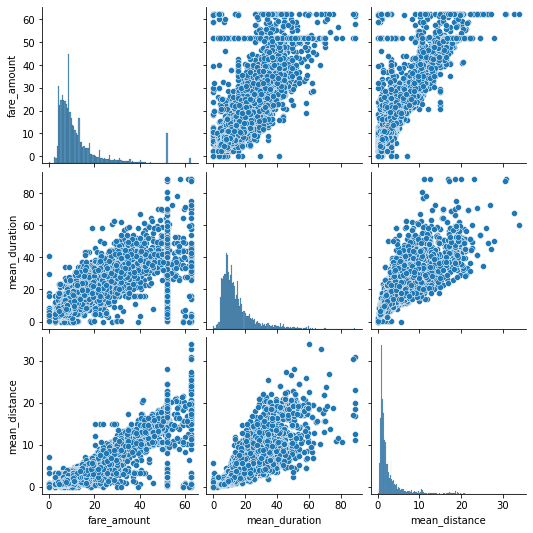

In [32]:
# Create a pairplot to visualize pairwise relationships between variables in the data
sns.pairplot(df0[["fare_amount", "mean_duration", "mean_distance"]]);

These variables all show linear correlation with each other. Investigate this further.

### 7. Identify correlations

In [33]:
# Correlation matrix to help determine most correlated variables
df0.corr()

,VendorID,passenger_count,fare_amount,mean_distance,mean_duration,rush_hour
VendorID,1.000000,0.266463,0.001045,0.004741,0.001876,-0.000752
passenger_count,0.266463,1.000000,0.014942,0.013428,0.015852,-0.024283
fare_amount,0.001045,0.014942,1.000000,0.910185,0.859105,-0.025901
mean_distance,0.004741,0.013428,0.910185,1.000000,0.874864,-0.046794
mean_duration,0.001876,0.015852,0.859105,0.874864,1.000000,-0.027499
rush_hour,-0.000752,-0.024283,-0.025901,-0.046794,-0.027499,1.000000


Visualize a correlation heatmap of the data.

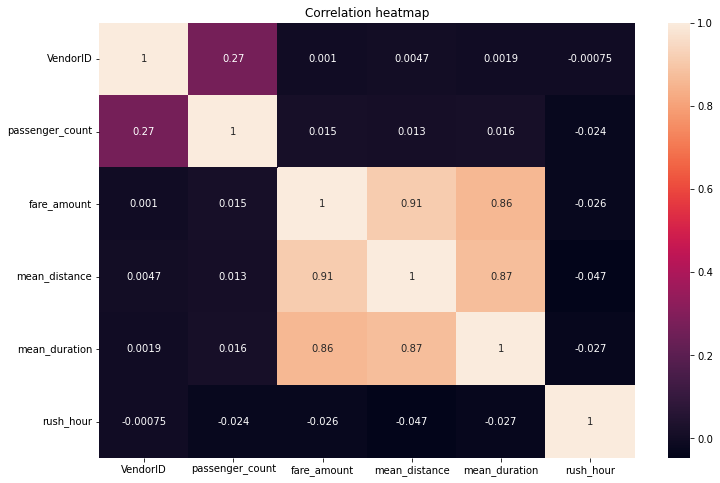

In [34]:
# Create correlation heatmap
plt.figure(figsize=(12, 8))
fg = sns.heatmap(df0.corr(), annot=True)
fg.set_title("Correlation heatmap")
plt.show()

### 8a. Split data into outcome variable and features

In [35]:
X, y = df0.drop("fare_amount", axis=1), df0[["fare_amount"]]
X.head()

,VendorID,passenger_count,mean_distance,mean_duration,rush_hour
0,2,6,3.521667,22.847222,0
1,1,1,3.108889,24.470370,0
2,1,1,0.881429,7.250000,1
3,2,1,3.700000,30.250000,0
4,2,1,4.435000,14.616667,0


In [36]:
y.head()

,fare_amount
0,13.0
1,16.0
2,6.5
3,20.5
4,16.5


### 8b. Pre-process data


Dummy encode categorical variables

In [37]:
# Convert VendorID to string
X.VendorID = X.VendorID.astype("str")
# Get dummies
X = pd.get_dummies(X, drop_first=True)
X.head()

,passenger_count,mean_distance,mean_duration,rush_hour,VendorID_2
0,6,3.521667,22.847222,0,1
1,1,3.108889,24.470370,0,0
2,1,0.881429,7.250000,1,0
3,1,3.700000,30.250000,0,1
4,1,4.435000,14.616667,0,1


### Split data into training and test sets

Create training and testing sets. The test set should contain 20% of the total samples. Set `random_state=0`.

In [38]:
# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

### Standardize the data

Use `StandardScaler()`, `fit()`, and `transform()` to standardize the `X_train` variables. Assign the results to a variable called `X_train_scaled`.

In [39]:
# Standardize the X variables
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
print('X_train scaled:', X_train_scaled)

X_train scaled: [[-0.50301524  0.8694684   0.17616665 -0.77153979  0.89286563]
 [-0.50301524 -0.60011281 -0.69829589  1.29610943  0.89286563]
 [ 0.27331093 -0.47829156 -0.57301906 -0.77153979 -1.11998936]
 ...
 [-0.50301524 -0.45121122 -0.6788917  -0.77153979 -1.11998936]
 [-0.50301524 -0.58944763 -0.85743597  1.29610943 -1.11998936]
 [ 1.82596329  0.83673851  1.13212101 -0.77153979  0.89286563]]


### Fit the model

In [40]:
# Fit your model to the training data
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### 8c. Evaluate model

### Train data

Evaluate the model performance by calculating the residual sum of squares and the explained variance score (R^2). Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.

In [41]:
# Evaluate the model performance on the training data
r_sq = lr.score(X_train_scaled, y_train)
print('Coefficient of determination:', r_sq)
y_pred_train = lr.predict(X_train_scaled)
print('R^2:', r2_score(y_train, y_pred_train))
print('MAE:', mean_absolute_error(y_train, y_pred_train))
print('MSE:', mean_squared_error(y_train, y_pred_train))
print('RMSE:',np.sqrt(mean_squared_error(y_train, y_pred_train)))

Coefficient of determination: 0.839866631223281
R^2: 0.839866631223281
MAE: 2.186238565532888
MSE: 17.887144535024106
RMSE: 4.229319630274366


### Test data

In [42]:
# Scale the X_test data
X_test_scaled = scaler.transform(X_test)

In [43]:
# Evaluate the model performance on the testing data
r_sq = lr.score(X_test_scaled, y_test)
print('Coefficient of determination:', r_sq)
y_pred_test = lr.predict(X_test_scaled)
print('R^2:', r2_score(y_test, y_pred_test))
print('MAE:', mean_absolute_error(y_test, y_pred_test))
print('MSE:', mean_squared_error(y_test, y_pred_test))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred_test)))

Coefficient of determination: 0.8682469790456719
R^2: 0.8682469790456719
MAE: 2.1336582291943444
MSE: 14.327692251527624
RMSE: 3.7851938195457873


### 9a. Results

Get `actual`,`predicted`, and `residual` for the testing set, and store them as columns in a `results` dataframe.

In [44]:
# Create a `results` dataframe
data = {
    'actual': y_test.fare_amount,
    'predicted': y_pred_test.ravel(),
}
data['residual'] = data['actual'] - data['predicted']

results = pd.DataFrame(data=data)
results.head()

,actual,predicted,residual
5818,14.0,12.333763,1.666237
18134,28.0,16.542899,11.457101
4655,5.5,6.703877,-1.203877
7378,15.5,16.205251,-0.705251
13914,9.5,10.514265,-1.014265


### 9b. Visualize model results

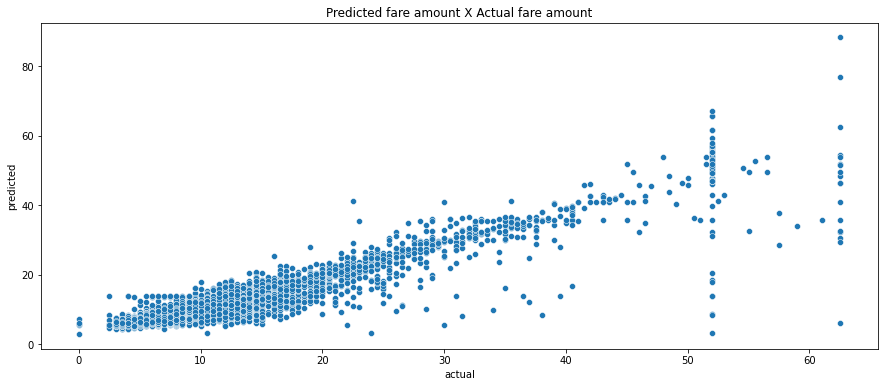

In [45]:
# Create a scatterplot to visualize `predicted` over `actual`
plt.figure(figsize=(15, 6))
fg = sns.scatterplot(data=results, x="actual", y="predicted")
fg.set_title("Predicted fare amount X Actual fare amount")
plt.show()

Visualize the distribution of the `residuals` using a histogram.

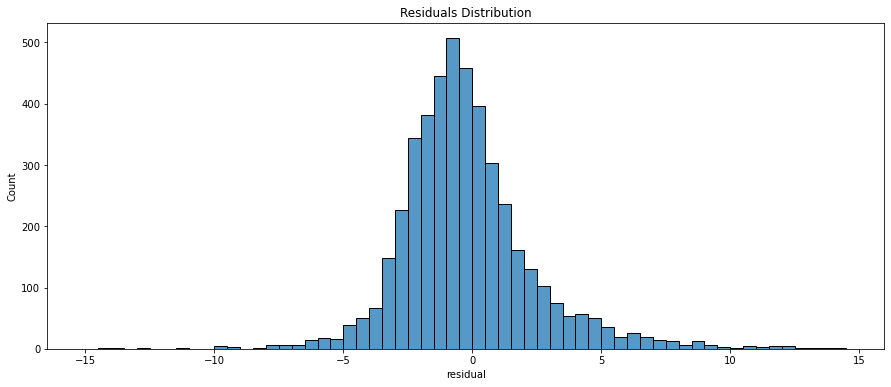

In [46]:
# Visualize the distribution of the `residuals`
# Create a scatterplot to visualize `predicted` over `actual`
plt.figure(figsize=(15, 6))
fg = sns.histplot(data=results, x="residual", bins=np.arange(-15, 15, .5))
fg.set_title("Residuals Distribution")
plt.show()

In [47]:
# Calculate residual mean
results['residual'].mean()

-0.015181994717796892

Create a scatterplot of `residuals` over `predicted`.

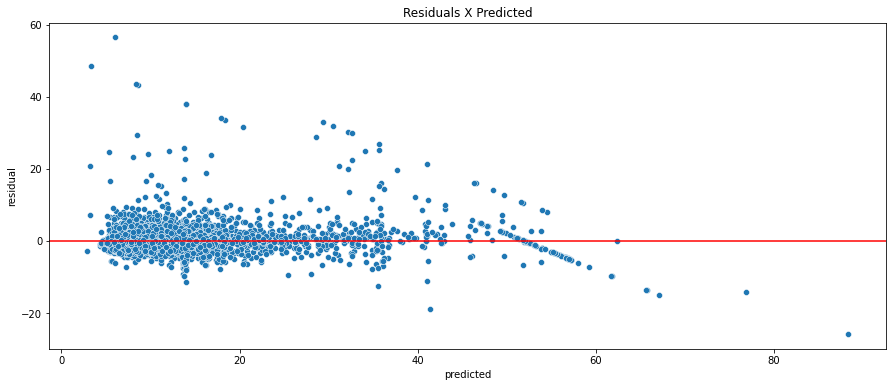

In [48]:
# Create a scatterplot of `residuals` over `predicted`
plt.figure(figsize=(15, 6))
fg = sns.scatterplot(data=results, x="predicted", y="residual")
fg.set_title("Residuals X Predicted")
plt.axhline(0, c='red')
plt.show()

### 9c. Coefficients

In [49]:
# Output the model's coefficients
coefficients = pd.DataFrame(lr.coef_, columns=X.columns)
coefficients

,passenger_count,mean_distance,mean_duration,rush_hour,VendorID_2
0,0.031544,7.135758,2.811583,0.121491,-0.054611
